# Callum Rennie - 08/12/24

# Example Dashboard

## 1) Stacked Column Chart

The chart below shows the number of penguins, for 3 different species, which have above average body mass. The height of the bar/column represents the total number of benguins from each species in the sample. The colour of the bars show how manh of the penguins sampled have above and below average body mass.

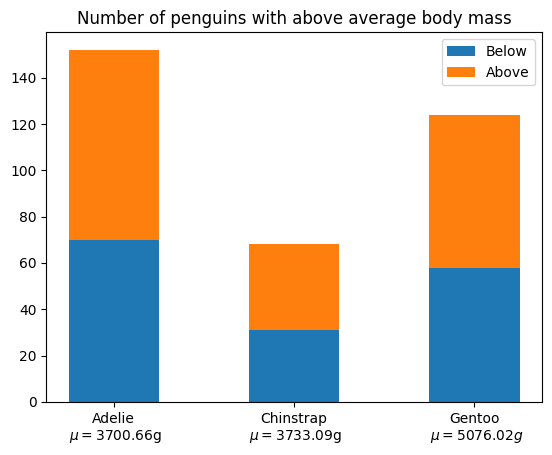

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()

## 2) Timeline with lines, dates and text

The below chart is a timeline that highlights key dates.

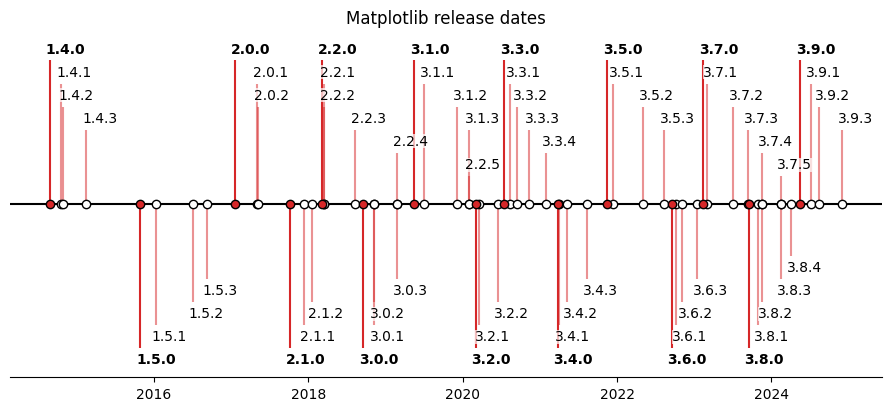

In [8]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import json
    import urllib.request

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=1).read().decode())

    dates = []
    releases = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            releases.append(item['tag_name'].lstrip("v"))

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    releases = ['2.2.4', '3.0.3', '3.0.2', '3.0.1', '3.0.0', '2.2.3',
                '2.2.2', '2.2.1', '2.2.0', '2.1.2', '2.1.1', '2.1.0',
                '2.0.2', '2.0.1', '2.0.0', '1.5.3', '1.5.2', '1.5.1',
                '1.5.0', '1.4.3', '1.4.2', '1.4.1', '1.4.0']
    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]  # Convert strs to dates.
dates, releases = zip(*sorted(zip(dates, releases)))  # Sort by increasing date.

# Choose some nice levels: alternate minor releases between top and bottom, and
# progressievly shorten the stems for bugfix releases.
levels = []
major_minor_releases = sorted({release[:3] for release in releases})
for release in releases:
    major_minor = release[:3]
    bugfix = int(release[4])
    h = 1 + 0.8 * (5 - bugfix)
    level = h if major_minor_releases.index(major_minor) % 2 == 0 else -h
    levels.append(level)

# The figure and the axes.
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Matplotlib release dates")

# The vertical stems.
ax.vlines(dates, 0, levels,
          color=[("tab:red", 1 if release.endswith(".0") else .5)
                 for release in releases])
# The baseline.
ax.axhline(0, c="black")
# The markers on the baseline.
minor_dates = [date for date, release in zip(dates, releases) if release[-1] == '0']
bugfix_dates = [date for date, release in zip(dates, releases) if release[-1] != '0']
ax.plot(bugfix_dates, np.zeros_like(bugfix_dates), "ko", mfc="white")
ax.plot(minor_dates, np.zeros_like(minor_dates), "ko", mfc="tab:red")

# Annotate the lines.
for date, level, release in zip(dates, levels, releases):
    ax.annotate(release, xy=(date, level),
                xytext=(-3, np.sign(level)*3), textcoords="offset points",
                verticalalignment="bottom" if level > 0 else "top",
                weight="bold" if release.endswith(".0") else "normal",
                bbox=dict(boxstyle='square', pad=0, lw=0, fc=(1, 1, 1, 0.7)))

ax.yaxis.set(major_locator=mdates.YearLocator(),
             major_formatter=mdates.DateFormatter("%Y"))

# Remove the y-axis and some spines.
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

## 3) Violin Plot

A violin plot is a data visualization that combines aspects of a box plot and a density plot. It shows the distribution of a dataset, with the "violin" shape representing the density of the data at different values.

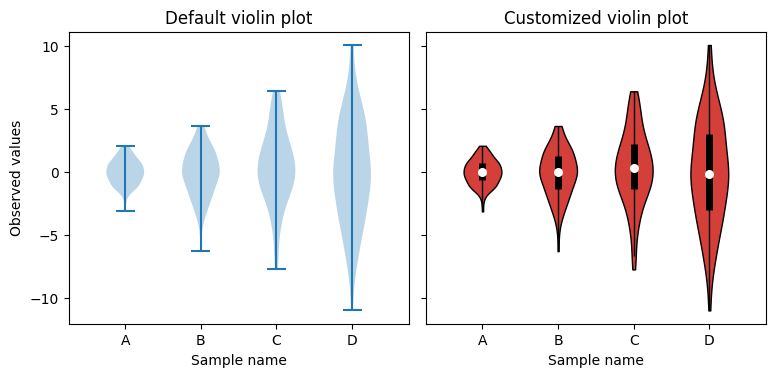

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

## My First Binder

https://github.com/CR984/my-first-binder/tree/main

https://mybinder.org/v2/gh/CR984/my-first-binder/HEAD?labpath=%2Fvoila%2Frender%2Fdashboard-test.ipynb